# Predict Post Test Score
<h2>Content:</h2> It contains information about a test written by some students. It include features such as: School setting, School type, gender, pretetest scores among other. Explore the data to know more!
<h2>Task:</h2> Let's build an efficient ML model that predicts post test scores with minimal error and high accuracy

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/test_scores.csv')
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [ ]:
pd.crosstab(df['school_setting'], df['school_type'])

school_type,Non-public,Public
school_setting,,
Rural,97,413
Suburban,193,524
Urban,261,645


Finding: We can see that most of students are from Public School.

In [ ]:
pd.crosstab(df['school_type'], df['lunch'], normalize= 'index')

lunch,Does not qualify,Qualifies for reduced/free lunch
school_type,,
Non-public,0.713249,0.286751
Public,0.519595,0.480405


In [ ]:
pd.pivot_table(df, values=['posttest'], index=['school_type'], columns=['lunch'], aggfunc= np.mean)

posttest                                 
lunch       Does not qualify Qualifies for reduced/free lunch
school_type                                                  
Non-public         79.399491                        67.411392
Public             71.973236                        55.410526

Finding: We can see that the highest scores are scored by students from Private school that dosen't serve lunch.

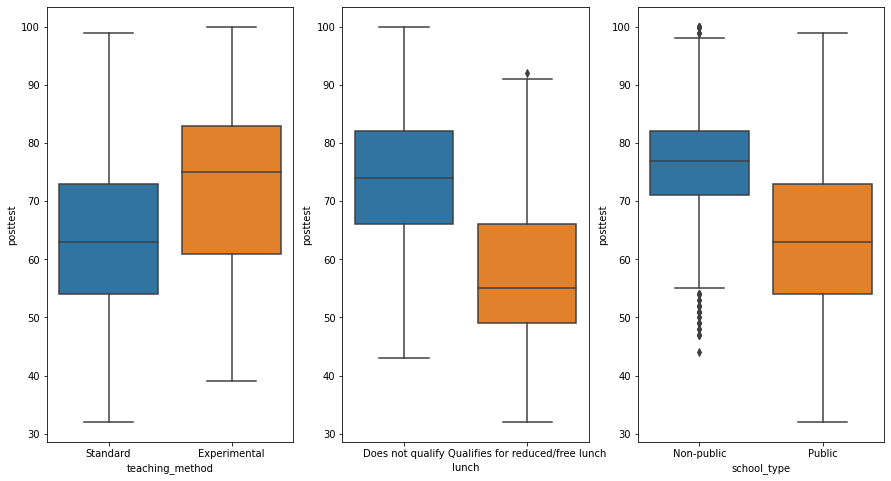

In [ ]:
f, axes = plt.subplots(1,3, figsize = (15,8))
sns.boxplot(data = df, x = 'teaching_method', y = 'posttest', ax = axes[0])
sns.boxplot(data = df, x = 'lunch', y = 'posttest', ax = axes[1])
sns.boxplot(data = df, x = 'school_type', y = 'posttest', ax = axes[2])
plt.show()


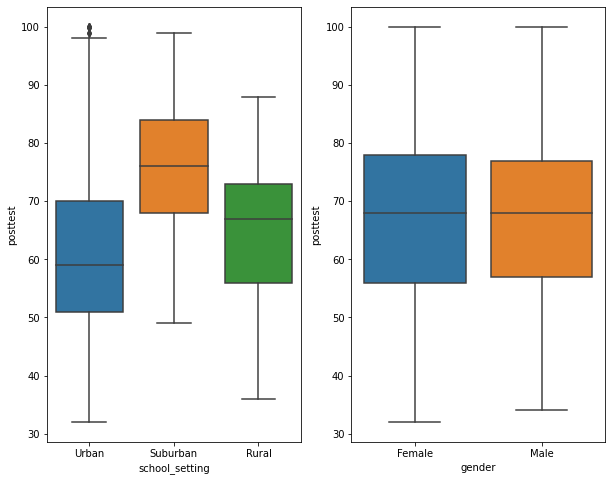

In [ ]:
f, axes = plt.subplots(1,2, figsize = (10,8))
sns.boxplot(data = df, x= 'school_setting', y = 'posttest', ax = axes[0])
sns.boxplot(data = df, x = 'gender', y = 'posttest', ax = axes[1])
plt.show()

In [ ]:
# difference between mean of 'pretest' and 'posttest'
pre_desc = df['pretest'].describe()
post_desc = df['posttest'].describe()

diff = post_desc['mean'] - pre_desc['mean']
diff

12.146272855133617

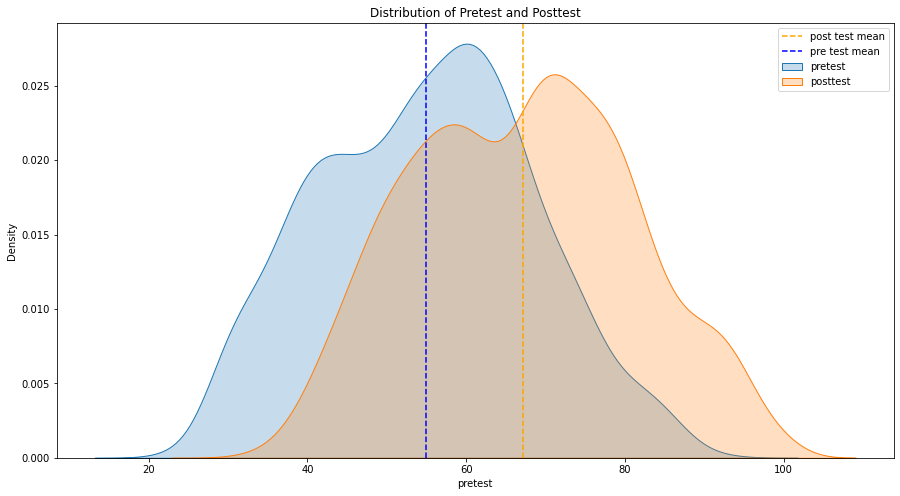

In [ ]:
# Comparing the distribution of Pretest and Posttest
plt.figure(figsize = (15,8))
sns.kdeplot(data = df['pretest'], shade = True, label = 'pretest')
sns.kdeplot(data = df['posttest'], shade = True, label = 'posttest')
plt.title('Distribution of Pretest and Posttest')
plt.axvline(x = post_desc['mean'], linestyle = '--', color = 'orange', label = 'post test mean')
plt.axvline(x = pre_desc['mean'], linestyle = '--', color = 'blue', label = 'pre test mean')
plt.legend()
plt.show()

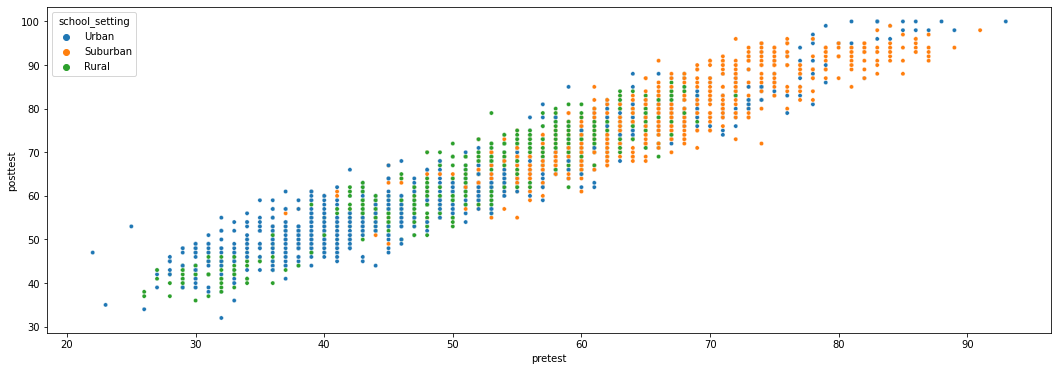

In [ ]:
# Observing the spread of pretest and posttest with reference to school_setting
plt.figure(figsize = (18,6))
sns.scatterplot(data = df, x = 'pretest', y = 'posttest', hue = 'school_setting', s=18)
plt.show()

## Models for post test score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Making  a function to create dictionary with errors and r2 score:
def evaluating (y_act, y_pred):
  MAE = mean_absolute_error(y_act, y_pred)
  MSE = mean_squared_error(y_act, y_pred)
  r2= r2_score(y_act, y_pred)
  eval_values = {'MAE' : round(MAE,3), 'MSE' : round(MSE,3), 'r2' : round(r2,3)}
  print('Result:\n Mean Absolute Error =', round(MAE,3), '\n Mean Squarred Error =', round(MSE,3), '\n r2 =', round(r2,3))

  return eval_values

Using the variable which impact the 'Posttest' the most by observing the boxplots above.
Using dummies for qualitative variables.

In [ ]:
X = df[['n_student', 'lunch', 'school_type', 'school_setting', 'teaching_method', 'pretest']]
Y = df[['posttest']]
X = pd.get_dummies(X)
X.head()

,n_student,pretest,lunch_Does not qualify,lunch_Qualifies for reduced/free lunch,school_type_Non-public,school_type_Public,school_setting_Rural,school_setting_Suburban,school_setting_Urban,teaching_method_Experimental,teaching_method_Standard
0,20.0,62.0,1,0,1,0,0,0,1,0,1
1,20.0,66.0,1,0,1,0,0,0,1,0,1
2,20.0,64.0,1,0,1,0,0,0,1,0,1
3,20.0,61.0,1,0,1,0,0,0,1,0,1
4,20.0,64.0,1,0,1,0,0,0,1,0,1


# Linear Regression Model
Using only values of pretest to predict the posttest score

In [ ]:
Xlin = X[['pretest']]
[x_adj, x_tst, y_adj, y_tst] = train_test_split(Xlin, Y, test_size = 0.35, random_state = 5)

model_linear = LinearRegression()
model_linear.fit(x_adj, y_adj)

y_pred = model_linear.predict(x_tst)

only_pret_eval = evaluating(y_tst, y_pred)

Result:
 Mean Absolute Error = 3.428 
 Mean Squarred Error = 18.395 
 r2 = 0.907


##  Multiple Linear Regression
Model using the two quantitative variables i) pretest ii) No. of students in class to predict posttest.

In [ ]:
Xlin = X[['pretest', 'n_student']]
[x_adj, x_tst, y_adj, y_tst] = train_test_split(Xlin, Y, test_size = 0.35, random_state = 5)

model_linear = LinearRegression()
model_linear.fit(x_adj, y_adj)

y_pred = model_linear.predict(x_tst)

pret_n_eval = evaluating(y_tst, y_pred)

Result:
 Mean Absolute Error = 3.389 
 Mean Squarred Error = 17.995 
 r2 = 0.909


Model using following variables:
<ul><li>Pre test</li>
<li>No. of students in classroom</li>
<li>School setting</li>
<li>School type</li>
<li>Teaching method</li>
<li>Lunch</li></ul>

In [ ]:
[x_adj, x_tst, y_adj, y_tst] = train_test_split(X, Y, test_size = 0.35, random_state = 5)

model_linear = LinearRegression()
model_linear.fit(x_adj, y_adj)

y_pred = model_linear.predict(x_tst)

multi_eval = evaluating(y_tst, y_pred)

Result:
 Mean Absolute Error = 2.662 
 Mean Squarred Error = 11.123 
 r2 = 0.944
